<a href="https://colab.research.google.com/github/niyati10000/Image-Processing-Portfolio/blob/main/1_Spatial_Transformations/Basics_%26_Spatial_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


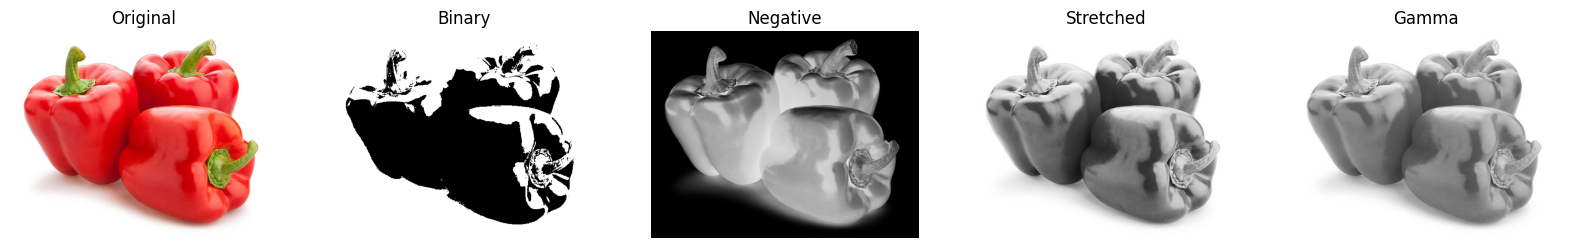

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img.jpg')
pic = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pic1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(pic1[:5, :5])

threshold = 128
pic2 = pic1 > threshold

dg = 255 - pic1

[m, n] = pic1.shape
r1, r2, s1, s2 = 30, 150, 10, 200

a = s1 / r1
b = (s2 - s1) / (r2 - r1)
c = (255 - s2) / (255 - r2)

s = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        if pic1[i, j] < r1:
            s[i, j] = a * pic1[i, j]
        elif pic1[i, j] < r2:
            s[i, j] = b * (pic1[i, j] - r1) + s1
        else:
            s[i, j] = c * (pic1[i, j] - r2) + s2

stretched_img = np.uint8(s)

gamma = 0.5
img_normalized = pic1 / 255.0
img_power = np.power(img_normalized, gamma)
img_result = np.uint8(img_power * 255)

plt.figure(figsize=(20, 10))
titles = ['Original', 'Binary', 'Negative', 'Stretched', 'Gamma']
images = [pic, pic2, dg, stretched_img, img_result]

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray' if i > 0 else None)
    plt.title(titles[i])
    plt.axis('off')

plt.show()